<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Project <br>
<font color=696880 size=4>
    Project Team 
    
    
____


### Full Name : 
### Student Number : 
___

# Introduction

In this project, we are going to have a brief and elementary hands-on real-world project, predicting breast cancer survival using machine learning models with clinical data and gene expression profiles.

# Data Documentation

For this purpose, we will use "Breast Cancer Gene Expression Profiles (METABRIC)" data. 
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "_mut" at the end of the names of the columns) 
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).

# Data Preparation (15 Points)

In this section you must first split data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset. (We will not use this dataset in further steps of the project)

## Data Loading & Splitting

In [ ]:
!pip install 'umap-learn==0.3.10'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import umap as umap

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

import tensorflow
from IPython.display import Image, clear_output
from tensorflow.keras import regularizers
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# TODO
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML Project/METABRIC_RNA_Mutation.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
clinical_dataset = df.iloc[:,:31]

gene_dataset = df.iloc[:,31:]

gene_cols = gene_dataset.columns
cols = []
for col in gene_cols:
  if col.endswith('_mut'):
    pass
  else:
    cols.append(col)
geneExpression_dataset = gene_dataset.loc[:, gene_dataset.columns.isin(cols)]

geneMutation_dataset = df.filter(regex='_mut')

target = df['overall_survival']

# remove data leakage
clinical_dataset.drop(['death_from_cancer'], axis=1, inplace=True)


## EDA

For each dataset, you must perform a sufficient EDA.

In [5]:
# TODO
print(clinical_dataset.isnull().sum().sum())
print(geneExpression_dataset.isnull().sum().sum())

1099
0


In [6]:
le = preprocessing.LabelEncoder()

In [7]:
# clinic_cols = clinical_dataset.columns
for c in clinical_dataset.select_dtypes(include=['object']).columns:
  le.fit(clinical_dataset[c])
  clinical_dataset[c] = le.transform(clinical_dataset[c])

In [8]:
# filling null values with mean of column
clinical_dataset.fillna(clinical_dataset.mean(), inplace=True)

In [9]:
print(clinical_dataset.isna().sum().sum())

0


In [10]:
# clinical data split
X_train_clinical, X_test_clinical, y_train_clinical, y_test_clinical = train_test_split(clinical_dataset, target, test_size=0.3, random_state=0)
X_train_geneExp, X_test_geneExp, y_train_geneExp, y_test_geneExp = train_test_split(geneExpression_dataset, target, test_size=0.3, random_state=0)


## Dimension Reduction (20 + Up to 10 Points Optional)

For each dataset, investigate whether it is needed to use a dimensionality reduction approach or not. If yes, please reduce the dataset's dimension. You can use UMAP for this purpose but any other approach is acceptable. Finding the most important features contains extra points.

In [11]:
geneReduced_dataset = geneExpression_dataset.copy()
X_train_geneRed, X_test_geneRed, y_train_geneRed, y_test_geneRed = train_test_split(geneReduced_dataset, target, test_size=0.3, random_state=0)
X_train_geneRed = X_train_geneRed - X_train_geneRed.mean() / len(X_train_geneRed)
X_test_geneRed = X_test_geneRed - X_test_geneRed.mean() / len(X_test_geneRed) 

# dimention reduction
pca = PCA(n_components=10)
X_train_geneRed = pca.fit_transform(X_train_geneRed)
X_test_geneRed = pca.transform(X_test_geneRed)

In [12]:
print(X_train_geneExp.shape)
print(X_train_geneRed.shape)

(1332, 489)
(1332, 10)


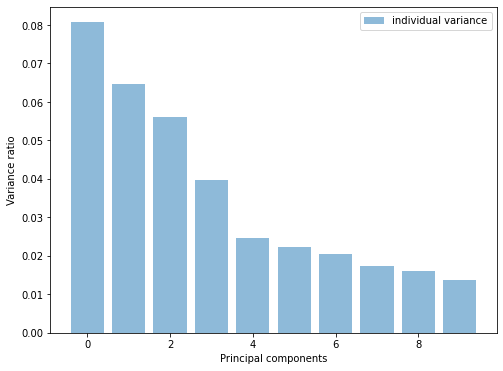

In [13]:
pca_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.bar(np.arange(0,10), height=pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

# Classic Model (25 Points)

In this section, you must implement a classic classification model for clinical, gene expressions, and reduced gene expressions datasets. Using Random Forest is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
# TODO

In [14]:
model = RandomForestClassifier(n_estimators= 5, criterion="entropy", max_depth=2)
model.fit(X_train_clinical, y_train_clinical)
y_pred_clinical = model.predict(X_test_clinical)
print(accuracy_score(y_test_clinical, y_pred_clinical))

0.9370629370629371


In [15]:
model = None
model = RandomForestClassifier(n_estimators= 5, criterion="entropy", max_depth=2)
model.fit(X_train_geneExp, y_train_geneExp)
y_pred_geneExp = model.predict(X_test_geneExp)
print(accuracy_score(y_test_geneExp, y_pred_geneExp))

0.6066433566433567


In [22]:
model = None
model = RandomForestClassifier(n_estimators= 5, criterion="entropy", max_depth=2)
model.fit(X_train_geneRed, y_train_geneRed)
y_pred_geneRed = model.predict(X_test_geneRed)
print(accuracy_score(y_test_geneRed, y_pred_geneRed))

0.6013986013986014


# Neural Network (30 Points)

In this section, you must implement a neural network model for clinical, gene expressions and reduced gene expressions datasets. Using the MPL models is suggested. (minimum acceptable accuracy = 60%)

In [ ]:
# TODO

In [30]:
nn_model = None
nn_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.L2(0.002), bias_regularizer=regularizers.L2(0.002)),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01))
])

nn_model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = tensorflow.keras.optimizers.Adam(),
    metrics = tensorflow.keras.metrics.BinaryAccuracy()
)

nn_model.fit(X_train_clinical, y_train_clinical, epochs=65, validation_data= (X_test_clinical, y_test_clinical))

loss_clinical, acc_clinical = nn_model.evaluate(X_test_clinical, y_test_clinical)
print(loss_clinical, acc_clinical)

Epoch 1/65
42/42 [==============================] - 1s 8ms/step - loss: 414.9956 - binary_accuracy: 0.4775 - val_loss: 95.2040 - val_binary_accuracy: 0.4231
Epoch 2/65
42/42 [==============================] - 0s 4ms/step - loss: 312.4317 - binary_accuracy: 0.4670 - val_loss: 8.1297 - val_binary_accuracy: 0.6538
Epoch 3/65
42/42 [==============================] - 0s 4ms/step - loss: 252.4612 - binary_accuracy: 0.5315 - val_loss: 7.7008 - val_binary_accuracy: 0.6766
Epoch 4/65
42/42 [==============================] - 0s 4ms/step - loss: 220.9907 - binary_accuracy: 0.5375 - val_loss: 7.6370 - val_binary_accuracy: 0.6731
Epoch 5/65
42/42 [==============================] - 0s 3ms/step - loss: 191.9805 - binary_accuracy: 0.5428 - val_loss: 6.1506 - val_binary_accuracy: 0.6748
Epoch 6/65
42/42 [==============================] - 0s 4ms/step - loss: 161.5621 - binary_accuracy: 0.5631 - val_loss: 6.1490 - val_binary_accuracy: 0.6836
Epoch 7/65
42/42 [==============================] - 0s 4ms/step

In [29]:
nn_model = None
nn_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(10, activation='relu', kernel_regularizer=regularizers.L2(0.002), bias_regularizer=regularizers.L2(0.002)),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01))
])

nn_model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = tensorflow.keras.optimizers.Adam(),
    metrics = tensorflow.keras.metrics.BinaryAccuracy()
)

nn_model.fit(X_train_geneExp, y_train_geneExp, epochs=65, validation_data= (X_test_geneExp, y_test_geneExp))

loss_geneExp, acc_geneExp = nn_model.evaluate(X_test_geneExp, y_test_geneExp)
print(loss_geneExp, acc_geneExp)

Epoch 1/65
42/42 [==============================] - 5s 21ms/step - loss: 0.9127 - binary_accuracy: 0.5165 - val_loss: 0.7983 - val_binary_accuracy: 0.5350
Epoch 2/65
42/42 [==============================] - 0s 7ms/step - loss: 0.7540 - binary_accuracy: 0.6044 - val_loss: 0.7370 - val_binary_accuracy: 0.5874
Epoch 3/65
42/42 [==============================] - 0s 6ms/step - loss: 0.6870 - binary_accuracy: 0.6396 - val_loss: 0.7187 - val_binary_accuracy: 0.6031
Epoch 4/65
42/42 [==============================] - 0s 7ms/step - loss: 0.6572 - binary_accuracy: 0.6682 - val_loss: 0.7125 - val_binary_accuracy: 0.5997
Epoch 5/65
42/42 [==============================] - 0s 4ms/step - loss: 0.6318 - binary_accuracy: 0.6832 - val_loss: 0.7041 - val_binary_accuracy: 0.5979
Epoch 6/65
42/42 [==============================] - 0s 3ms/step - loss: 0.6046 - binary_accuracy: 0.7065 - val_loss: 0.7039 - val_binary_accuracy: 0.6084
Epoch 7/65
42/42 [==============================] - 0s 4ms/step - loss: 0.5

In [28]:
nn_model = None
nn_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(10, activation='sigmoid', kernel_regularizer=regularizers.L2(0.002), bias_regularizer=regularizers.L2(0.002)),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(1, activation='relu', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01))
])

nn_model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = tensorflow.keras.optimizers.Adam(),
    metrics = tensorflow.keras.metrics.BinaryAccuracy()
)

nn_model.fit(X_train_geneRed, y_train_geneRed, epochs=65, validation_data= (X_test_geneRed, y_test_geneRed))

loss_geneRed, acc_geneRed = nn_model.evaluate(X_test_geneRed, y_test_geneRed)
print(loss_geneRed, acc_geneRed)

Epoch 1/65
42/42 [==============================] - 3s 8ms/step - loss: 6.2045 - binary_accuracy: 0.5668 - val_loss: 6.1002 - val_binary_accuracy: 0.6014
Epoch 2/65
42/42 [==============================] - 0s 3ms/step - loss: 6.2038 - binary_accuracy: 0.5691 - val_loss: 5.9956 - val_binary_accuracy: 0.6014
Epoch 3/65
42/42 [==============================] - 0s 4ms/step - loss: 6.0407 - binary_accuracy: 0.5661 - val_loss: 5.8921 - val_binary_accuracy: 0.6014
Epoch 4/65
42/42 [==============================] - 0s 4ms/step - loss: 5.9845 - binary_accuracy: 0.5646 - val_loss: 5.8215 - val_binary_accuracy: 0.6014
Epoch 5/65
42/42 [==============================] - 0s 3ms/step - loss: 5.8588 - binary_accuracy: 0.5698 - val_loss: 5.8020 - val_binary_accuracy: 0.6014
Epoch 6/65
42/42 [==============================] - 0s 3ms/step - loss: 5.7003 - binary_accuracy: 0.5721 - val_loss: 5.5470 - val_binary_accuracy: 0.6049
Epoch 7/65
42/42 [==============================] - 0s 4ms/step - loss: 5.71

In [31]:
print('Accuracy: Clinical vs GeneExpression vs GeneReduction: \n \t {:.4f} - {:.4f} - {:.4f}'.format(acc_clinical, acc_geneExp, acc_geneRed))

Accuracy: Clinical vs GeneExpression vs GeneReduction: 
 	 0.6713 - 0.6241 - 0.6049


# Model Comparison (10 Points)

Compare different models and different datasets (clinical, gene expressions, and gene reduced expressions) and try to explain their differences.

#### \# TODO
RANDOM FOREST:
Random forest baraye dataset Clinical kheyli khub amal kar; chon dataset bozorgi nabood (az nazar feature ha) be khubi mitoonest categorize bokone. Ama baraye dataset Gene Expression, chon tedad feature ha kheyli bishtare, deqat miad paeen va natije migirim baraye dataset haye bozorg, random forest kheyli monaseb nist. Deqat dataset Gene Reduced be nesbat Gene Expression behtare chon umadim component haye mohemytar ro negah dashtim.

NEURAL NETWORK:
Dar in halat, deqat Clinical kamtar shode be nesbate model random forest, dalilesh ham mitoone in bashe ke MLP kheyli sari overfit mikone va deqat ro tu in dataset miare paeen. Az tarafi deqat baraye dataset Gene Expression kami behtar shode, chon baraye dataset ha ba tedad feature bala, estefade az nearul network mitoone behtar bashe ama khatar overfit hast, be tori ke ba inke Gene Reduction kaheshe boad dashte, ama baz ham overfit shode (ehtemalan reduction be dorosti anjam nashode).

Hamchenin sorate train kardan model random forest kheyli bishtar az neural network hast.